In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import silhouette_score
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns

#1

##1A, 1B

In [ ]:
pre_df1 = pd.read_csv('/content/drive/MyDrive/GL AIML/Progress/Data/USL Part 1 Dataset/Car name.csv')
pre_df2 = pd.read_json('/content/drive/MyDrive/GL AIML/Progress/Data/USL Part 1 Dataset/Car-Attributes.json')

In [ ]:
pre_df1.shape

(398, 1)

In [ ]:
pre_df2.shape

(398, 8)

##1C

In [ ]:
df = pd.merge(pre_df1,pre_df2,how = 'inner',left_index = True,right_index=True)
print(df.shape)
df.head()

(398, 9)


,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin
0,chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1
1,buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1
2,plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1
3,amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1
4,ford torino,17.0,8,302.0,140,3449,10.5,70,1


##1D

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
cyl,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
disp,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
wt,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acc,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
yr,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0
origin,398.0,1.572864,0.802055,1.0,1.000,1.0,2.000,3.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   car_name  398 non-null    object 
 1   mpg       398 non-null    float64
 2   cyl       398 non-null    int64  
 3   disp      398 non-null    float64
 4   hp        398 non-null    object 
 5   wt        398 non-null    int64  
 6   acc       398 non-null    float64
 7   yr        398 non-null    int64  
 8   origin    398 non-null    int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


#2

##2A

In [ ]:
round(df.isnull().sum()/df.shape[0],2)

car_name    0.0
mpg         0.0
cyl         0.0
disp        0.0
hp          0.0
wt          0.0
acc         0.0
yr          0.0
origin      0.0
dtype: float64

##2B

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.dtypes

car_name     object
mpg         float64
cyl           int64
disp        float64
hp           object
wt            int64
acc         float64
yr            int64
origin        int64
dtype: object

In [ ]:
df = df.convert_dtypes()
df.dtypes

car_name     string
mpg         Float64
cyl           Int64
disp        Float64
hp           object
wt            Int64
acc         Float64
yr            Int64
origin        Int64
dtype: object

##2H

In [ ]:
df[df['hp']=='?']

,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin
32,ford pinto,25.0,4,98.0,?,2046,19.0,71,1
126,ford maverick,21.0,6,200.0,?,2875,17.0,74,1
330,renault lecar deluxe,40.9,4,85.0,?,1835,17.3,80,2
336,ford mustang cobra,23.6,4,140.0,?,2905,14.3,80,1
354,renault 18i,34.5,4,100.0,?,2320,15.8,81,2
374,amc concord dl,23.0,4,151.0,?,3035,20.5,82,1


In [ ]:
print(df[df['hp']=='?'].shape)

(6, 9)


In [ ]:
df['hp'] = np.where(df['hp']=='?',np.NAN,df['hp'])
print(df[df['hp']=='?'].shape)

(0, 9)


In [ ]:
df[df['hp']=='?']

,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin


In [ ]:
df['hp'].isnull().sum()

6

##2C

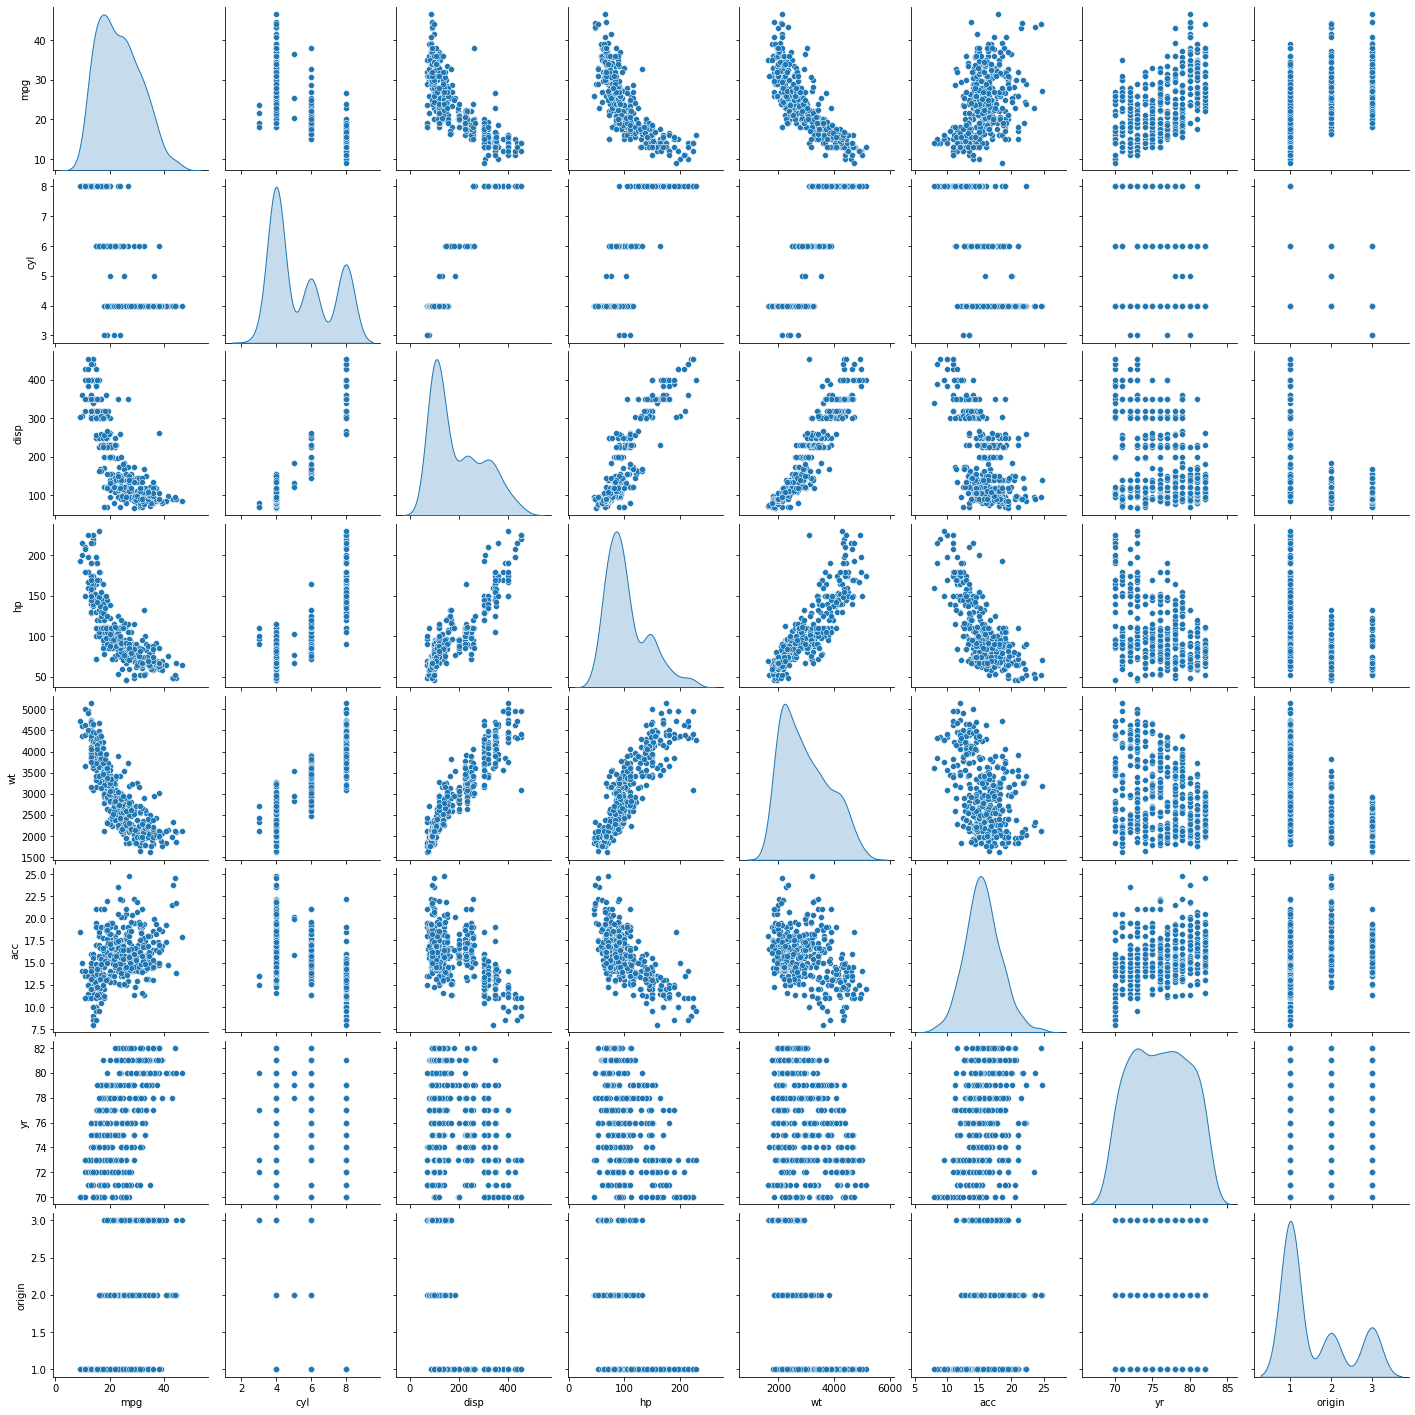

In [ ]:
sns.pairplot(df,diag_kind='kde')

In [ ]:
df['cyl'].value_counts()

4    204
8    103
6     84
3      4
5      3
Name: cyl, dtype: Int64

##2D

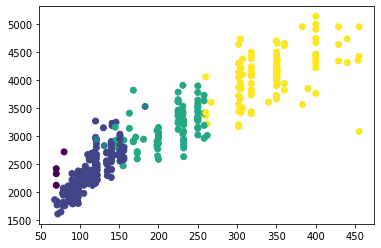

In [ ]:
plt.scatter(df['disp'],df['wt'],c=df['cyl']) 

##2E

Insight


*   the data is positively correlated
*   the feature is a strong predictor as the classes are distinguished clearly



##2F

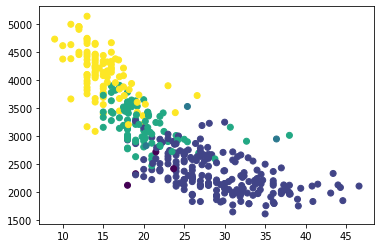

In [ ]:
plt.scatter(df['mpg'],df['wt'],c=df['cyl'])

##2G

Insights


*   the data is negatively correlated
*   this feature is not very strong predictor for class green



In [ ]:
df.isnull().sum()

car_name    0
mpg         0
cyl         0
disp        0
hp          6
wt          0
acc         0
yr          0
origin      0
dtype: int64

In [ ]:
df2  = df.iloc[:,1:]

In [ ]:
df2.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1


In [ ]:
scaled_array = StandardScaler().fit_transform(df2)
scaled_array

array([[-0.7064387 ,  1.49819126,  1.0906037 , ..., -1.29549834,
        -1.62742629, -0.71514478],
       [-1.09075062,  1.49819126,  1.5035143 , ..., -1.47703779,
        -1.62742629, -0.71514478],
       [-0.7064387 ,  1.49819126,  1.19623199, ..., -1.65857724,
        -1.62742629, -0.71514478],
       ...,
       [ 1.08701694, -0.85632057, -0.56103873, ..., -1.4407299 ,
         1.62198339, -0.71514478],
       [ 0.57460104, -0.85632057, -0.70507731, ...,  1.10082237,
         1.62198339, -0.71514478],
       [ 0.95891297, -0.85632057, -0.71467988, ...,  1.39128549,
         1.62198339, -0.71514478]])

In [ ]:
scaled_df = pd.DataFrame(data = scaled_array,columns = df2.columns)
scaled_df.sample(10)

,mpg,cyl,disp,hp,wt,acc,yr,origin
204,1.087017,-0.856321,-1.041167,-0.896659,-1.159200,0.519896,-0.002721,1.781589
344,1.983745,-0.856321,-1.031565,-1.052738,-1.295169,0.302049,1.351199,-0.715145
308,1.279173,-0.856321,-0.407398,-0.376395,-0.489993,-0.859804,0.809631,-0.715145
107,-0.706439,0.320935,0.370411,-0.116263,-0.214506,-0.206262,-0.815074,-0.715145
231,-1.026699,1.498191,1.983643,2.224924,1.601575,-1.222883,0.268063,-0.715145
257,-0.527093,0.320935,0.370411,-0.376395,0.283261,0.592512,0.538847,-0.715145
360,0.920482,0.320935,-0.465013,-0.740580,0.224143,1.463901,1.351199,0.533222
187,-0.770491,1.498191,1.071399,0.924265,1.471517,-0.932419,-0.002721,-0.715145
144,0.958913,-0.856321,-1.127590,-1.364896,-1.562379,0.338357,-0.544290,1.781589
65,-1.218855,1.498191,1.513117,1.262436,1.369835,-0.932419,-1.085858,-0.715145


##2B

In [ ]:
knnimp = KNNImputer(n_neighbors = 2)
predf3 = knnimp.fit_transform(scaled_df)

In [ ]:
df3 = pd.DataFrame(data = predf3,columns = scaled_df.columns)
df3.sample(10)

,mpg,cyl,disp,hp,wt,acc,yr,origin
150,0.318393,-0.856321,-0.820308,-0.298355,-0.685079,-0.024722,-0.544290,1.781589
180,0.190289,-0.856321,-0.695475,0.273935,-0.354023,-0.750880,-0.273506,0.533222
112,-0.578335,-0.856321,-0.685872,-0.506461,-0.780849,1.064514,-0.815074,-0.715145
159,-1.218855,1.498191,1.513117,1.132370,1.994113,-0.750880,-0.273506,-0.715145
323,0.561791,-0.856321,-0.359385,0.013803,-0.201501,-0.424109,1.080415,-0.715145
32,0.190289,-0.856321,-0.916334,-0.870646,-1.092988,1.246054,-1.356642,-0.715145
116,-0.962647,1.498191,1.983643,3.265452,1.546004,-2.203196,-0.815074,-0.715145
222,-0.834543,1.498191,0.639283,0.143869,1.288253,1.246054,0.268063,-0.715145
269,0.946103,-0.856321,-0.849116,-0.766593,-0.875437,-0.387801,0.538847,-0.715145
193,0.062185,0.320935,0.063128,-0.610514,0.049156,0.737743,-0.002721,-0.715145


In [ ]:
df3.isnull().sum()

mpg       0
cyl       0
disp      0
hp        0
wt        0
acc       0
yr        0
origin    0
dtype: int64

In [ ]:
x_train,  y_train,x_test, y_test = train_test_split(df3, df3, test_size=0.3, random_state=4320)
print(x_train.shape, x_test.shape, y_train.shape,y_test.shape)

(278, 8) (278, 8) (120, 8) (120, 8)


In [ ]:
x_train.sample(5)

,mpg,cyl,disp,hp,wt,acc,yr,origin
343,1.996555,-0.856321,-1.098783,-1.208817,-1.437051,0.483588,1.351199,1.781589
333,1.176690,0.320935,-0.244154,0.716159,-0.071443,-1.513346,1.080415,1.781589
86,-1.218855,1.498191,1.061796,1.184397,0.829504,-1.477038,-0.815074,-0.715145
288,-0.680818,1.498191,1.196232,0.794199,1.016314,-0.133646,0.809631,-0.715145
364,0.395255,1.498191,1.503514,0.013803,0.892168,1.246054,1.351199,-0.715145


In [ ]:
y_train.sample(5)

,mpg,cyl,disp,hp,wt,acc,yr,origin
344,1.983745,-0.856321,-1.031565,-1.052738,-1.295169,0.302049,1.351199,-0.715145
16,-0.706439,0.320935,0.053526,-0.194303,-0.232242,-0.024722,-1.627426,-0.715145
144,0.958913,-0.856321,-1.127590,-1.364896,-1.562379,0.338357,-0.544290,1.781589
354,1.407277,-0.856321,-0.897129,-0.558487,-0.769026,0.084201,1.351199,0.533222
145,1.087017,-0.856321,-1.060372,-1.130778,-1.143829,1.246054,-0.544290,1.781589


In [ ]:
x_test.sample(5)

,mpg,cyl,disp,hp,wt,acc,yr,origin
102,0.318393,-0.856321,-0.925936,-1.520975,-1.206493,1.972212,-0.815074,0.533222
208,-1.346959,1.498191,1.196232,1.184397,1.146372,-0.859804,-0.002721,-0.715145
39,-1.218855,1.498191,1.983643,1.834726,1.765921,-1.477038,-1.356642,-0.715145
129,0.958913,-0.856321,-1.098783,-0.974698,-1.206493,1.246054,-0.544290,1.781589
123,-0.450231,0.320935,-0.359385,0.456027,-0.193224,-0.750880,-0.815074,1.781589


In [ ]:
y_test.sample(5)

,mpg,cyl,disp,hp,wt,acc,yr,origin
0,-0.706439,1.498191,1.090604,0.664133,0.630870,-1.295498,-1.627426,-0.715145
362,0.087806,0.320935,-0.455410,0.404001,-0.047796,-0.641956,1.351199,1.781589
296,0.497739,-0.856321,-0.695475,-0.636527,-0.355205,-0.206262,0.809631,-0.715145
154,-1.090751,0.320935,0.543257,-0.844632,0.545741,1.972212,-0.273506,-0.715145
119,-0.450231,-0.856321,-0.762693,-0.350382,-0.459252,-0.569341,-0.815074,0.533222


In [ ]:
traindf = pd.concat([x_train,y_train],axis = 0)
traindf.shape

(398, 8)

In [ ]:
traindf.sample(10)

,mpg,cyl,disp,hp,wt,acc,yr,origin
237,0.894861,-0.856321,-0.916334,-1.078751,-1.087077,0.519896,0.268063,-0.715145
52,0.830809,-0.856321,-1.012360,-0.740580,-1.070524,-0.387801,-1.356642,0.533222
165,-0.450231,1.498191,0.658488,0.143869,0.296266,-0.750880,-0.273506,-0.715145
212,-0.898595,1.498191,1.503514,1.964792,1.666604,-1.259190,-0.002721,-0.715145
132,0.190289,-0.856321,-0.513026,-0.766593,-0.506545,0.519896,-0.544290,-0.715145
11,-1.218855,1.498191,1.407489,1.444529,0.755016,-2.747814,-1.627426,-0.715145
161,-0.962647,0.320935,0.543257,0.013803,1.095531,1.064514,-0.273506,-0.715145
286,-0.757680,1.498191,1.042591,0.638120,0.892168,-0.787188,0.809631,-0.715145
106,-1.475063,1.498191,1.503514,1.964792,1.807303,-1.113959,-0.815074,-0.715145
231,-1.026699,1.498191,1.983643,2.224924,1.601575,-1.222883,0.268063,-0.715145


In [ ]:
testdf = pd.concat([x_test,y_test],axis = 0)
testdf.shape

(398, 8)

In [ ]:
testdf.sample(10)

,mpg,cyl,disp,hp,wt,acc,yr,origin
211,-0.898595,0.320935,-0.244154,0.404001,1.004491,0.410972,-0.002721,0.533222
134,-0.962647,0.320935,0.620078,0.143869,0.782210,0.882975,-0.544290,-0.715145
17,-0.322127,0.320935,0.063128,-0.506461,-0.453340,0.156817,-1.627426,-0.715145
240,0.894861,-0.856321,-0.925936,-0.688553,-0.922731,-0.533033,0.268063,0.533222
115,-1.090751,1.498191,1.503514,1.054331,1.314265,-0.932419,-0.815074,-0.715145
328,0.830809,-0.856321,-0.455410,-0.974698,0.330554,2.262675,1.080415,0.533222
97,-0.706439,0.320935,0.303193,0.013803,0.178032,0.338357,-0.815074,-0.715145
7,-1.218855,1.498191,2.367746,2.875254,1.586204,-2.566274,-1.627426,-0.715145
298,-0.065919,1.498191,1.503514,0.534067,1.099078,0.665128,0.809631,-0.715145
104,-1.475063,1.498191,1.983643,1.626621,2.288517,-1.113959,-0.815074,-0.715145


##3A

In [ ]:
kmeans = KMeans(random_state = 4320)

In [ ]:
clustercenters = []
inertia = []

for k in range(2,10,1):
    kmeans =  KMeans(n_clusters = k,random_state=4320).fit(traindf)
    clustercenters.append(kmeans.cluster_centers_)
    inertia.append(kmeans.inertia_)
    print(kmeans.n_features_in_)
    print(kmeans.feature_names_in_)

print(clustercenters)
print(inertia)

8
['mpg' 'cyl' 'disp' 'hp' 'wt' 'acc' 'yr' 'origin']
8
['mpg' 'cyl' 'disp' 'hp' 'wt' 'acc' 'yr' 'origin']
8
['mpg' 'cyl' 'disp' 'hp' 'wt' 'acc' 'yr' 'origin']
8
['mpg' 'cyl' 'disp' 'hp' 'wt' 'acc' 'yr' 'origin']
8
['mpg' 'cyl' 'disp' 'hp' 'wt' 'acc' 'yr' 'origin']
8
['mpg' 'cyl' 'disp' 'hp' 'wt' 'acc' 'yr' 'origin']
8
['mpg' 'cyl' 'disp' 'hp' 'wt' 'acc' 'yr' 'origin']
8
['mpg' 'cyl' 'disp' 'hp' 'wt' 'acc' 'yr' 'origin']
[array([[ 0.66880501, -0.7663556 , -0.75160156, -0.61999886, -0.71137502,
         0.32535561,  0.32836833,  0.51141645],
       [-0.90625058,  1.03843451,  1.01844236,  0.82267468,  0.9639342 ,
        -0.44086648, -0.4449488 , -0.69298442]]), array([[-0.23301503, -0.12590632, -0.05634295, -0.25287977,  0.02416321,
         0.43720956,  0.08226919, -0.60579879],
       [-1.12726026,  1.4864187 ,  1.46865697,  1.45883577,  1.36736404,
        -1.03371846, -0.61198576, -0.71514478],
       [ 0.89844152, -0.81610375, -0.86426529, -0.70923458, -0.86985567,
         0.27002

##3B,3C

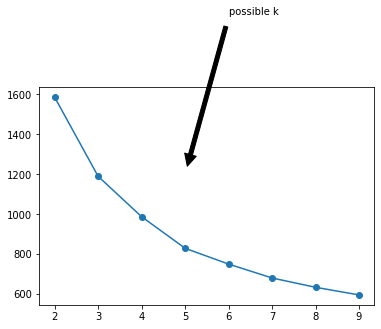

In [ ]:
plt.plot(range(2,10,1),inertia,marker='o')
plt.annotate('possible k',xy=(5,1200),xytext=(6,2000),arrowprops=dict(facecolor='black', shrink=0.05))
plt.show()

##3D

In [ ]:
kmeans =  KMeans(n_clusters = 5,random_state=4320).fit(traindf)
kmeans.cluster_centers_
kmeans.inertia_

828.0875633339632

In [ ]:
red_train = PCA(n_components = 2,random_state=4320).fit_transform(traindf)
red_train

array([[-3.68290164, -0.05025638],
       [ 1.71714315, -0.37007898],
       [-0.34576156,  1.12305613],
       [-1.06436487, -0.8304544 ],
       [-2.8749993 , -0.1963125 ],
       [-1.2983268 , -0.63645243],
       [-1.47373807,  2.33917543],
       [-1.77252762, -1.88099501],
       [-2.26617413, -1.13739288],
       [ 2.65450174, -1.01469894],
       [ 2.28297918, -0.28667798],
       [-1.04626182, -0.17729625],
       [ 3.3209338 ,  0.54884924],
       [-2.5048545 ,  0.65915522],
       [ 3.77756064,  0.49084411],
       [ 2.9871297 , -0.35402501],
       [ 0.14151212,  1.91218309],
       [ 2.83686453, -1.33201631],
       [-1.60197551,  0.37746292],
       [ 2.96544189, -0.90668626],
       [-0.70952506,  0.57819892],
       [-1.19503363, -1.36536117],
       [-0.89527561,  0.79796108],
       [ 5.15334943,  1.17484366],
       [-1.28870663,  1.66271517],
       [ 4.26044642,  0.39074482],
       [ 3.2333317 , -0.24893295],
       [-2.93648175,  1.08932036],
       [ 1.3865384 ,

In [ ]:
red_traindf = pd.DataFrame(red_train,columns = ['PC1','PC2'])
red_traindf.sample(5)

,PC1,PC2
117,-0.743015,-0.451415
142,0.553383,0.282510
159,1.300053,0.413353
10,2.282979,-0.286678
257,2.994910,1.245132


In [ ]:
red_traindf.shape

(398, 2)

##3E

In [ ]:
red_traindf['label'] = kmeans.labels_
red_traindf.sample(10)

,PC1,PC2,label
20,-0.709525,0.578199,0
391,1.035904,-0.852579,1
207,-1.146806,-1.090425,3
56,-0.565297,-0.728764,3
12,3.320934,0.548849,4
67,0.402735,0.684359,1
23,5.153349,1.174844,4
257,2.994910,1.245132,4
348,3.037099,-0.537644,4
166,3.820163,1.633633,4


In [ ]:
traindf['label'] = kmeans.labels_
traindf.sample(10)

,mpg,cyl,disp,hp,wt,acc,yr,origin,label
168,-0.065919,-0.856321,-0.513026,-0.558487,-0.391858,0.519896,-0.273506,-0.715145,3
102,0.318393,-0.856321,-0.925936,-1.520975,-1.206493,1.972212,-0.815074,0.533222,0
44,-1.346959,1.498191,1.983643,1.834726,2.565185,-1.295498,-1.356642,-0.715145,4
142,0.318393,-0.856321,-1.098783,-0.974698,-1.191123,-0.024722,-0.544290,0.533222,0
105,-1.346959,1.498191,1.599540,1.704660,1.990566,-0.932419,-0.815074,-0.715145,4
58,0.190289,-0.856321,-0.921135,-0.636527,-0.998401,0.519896,-1.085858,-0.715145,0
359,0.587411,-0.856321,-0.503423,-0.636527,0.306908,1.754364,1.351199,0.533222,3
289,-0.847353,1.498191,1.503514,1.314463,1.642957,-0.242570,0.809631,-0.715145,4
382,1.343225,-0.856321,-0.820308,-0.896659,-0.857702,0.483588,1.621983,1.781589,2
288,-0.680818,1.498191,1.196232,0.794199,1.016314,-0.133646,0.809631,-0.715145,1


##3F

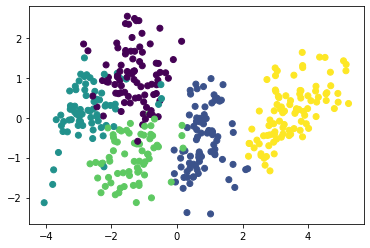

In [ ]:
plt.scatter(red_traindf['PC1'],red_traindf['PC2'],c = red_traindf['label'])

In [ ]:
silhouette_score(red_traindf.iloc[:,:-1],red_traindf.iloc[:,-1])

0.40469696459056453

##3G

In [ ]:
pred_y = kmeans.predict(testdf.iloc[[227]])
pred_y

array([4], dtype=int32)

In [ ]:
%%shell
jupyter nbconvert --to html //'/content/drive/MyDrive/GL AIML/Progress/Mini Projects/Un Supervised Learning/Unsupervised Mini Project Part A.ipynb'

[NbConvertApp] Converting notebook ///content/drive/MyDrive/GL AIML/Progress/Mini Projects/Un Supervised Learning/Unsupervised Mini Project Part A.ipynb to html
[NbConvertApp] Writing 1094904 bytes to ///content/drive/MyDrive/GL AIML/Progress/Mini Projects/Un Supervised Learning/Unsupervised Mini Project Part A.html
